# Simpy
**SymPy** no trabaja con una estructura de datos basada en números sino que trabaja con objetos que poseen atributos y métodos que tratan de reproducir el comportamiento matemático de las variables, funciones, ecuaciones, etc. con las que se trabaja habitualmente en cálculo diferencial e integral.

In [2]:
import sympy as sp

#### Variables simbólicas
Las variables `x` o `y` que vamos a definir no son números, ni tampoco pertenecen a los objetos definidos con  **NumPy**. Todas las variables simbólicas son objetos de la clase `sp.Symbol` y sus atributos y métodos son completamente diferentes

In [3]:
x = sp.Symbol('x') # define la variable simbólica x
y = sp.Symbol('y')

a, b, c = sp.symbols('a:c') # define como simbólicas las variables a, b, c.

p = sp.Symbol('p', positive = True) # Natural
q = sp.Symbol('q', real = True) # Real


In [4]:
x = sp.Symbol('x', nonnegative = True) # la raíz cuadrada de un número no negativo es real
y = sp.sqrt(x)
print(y.is_real)   # la salida de una variable lógica es True o None

y = 4**sp.S(2)
print(y.is_integer)

b = sp.sqrt(2) # √2
print(f"Es b un número racional? {b.is_rational}") 


b = 2**sp.S(-2) # 1/2²
print(f"Es b un número entero? {b.is_integer}") 

True
True
Es b un número racional? False
Es b un número entero? False


##### Constantes simbólicas y numéricas
Por ejemplo, podemos definir la constante simbólica $1/3$. Si hacemos lo mismo con números representados por defecto en Python, obtendríamos resultados muy diferentes.

In [ ]:
pi = sp.pi
E = sp.E
raiz = sp.sqrt(p)
infinito = sp.oo

frac_simbolico = sp.Rational(1,3) # Número racional de sympy
frac_numerico = 1/3 # Float

print(f"Fracción simbólica: {frac_simbolico} / {type(frac_simbolico)}")
print(f"Fracción Python: {frac_numerico} / {type(frac_numerico)}")

Fracción simbólica: 1/3 - <class 'sympy.core.numbers.Rational'>
Fracción Python: 0.3333333333333333 - <class 'float'>


##### Manipulación de expresiones

In [6]:
expr = (x-3)*(x-3)**2*(y-2)

expr_expandida = sp.expand(expr) # Expandir

expr_factorizada = sp.factor(expr) # Factorizar

expr_simplificada = sp.simplify((x**2 - 6*x + 9)/(x-3) - 3) # Simplificar

print(f"Expandida: {expr_expandida}")
print(f"Factorizada: {expr_factorizada}")
print(f"Simplificada: {expr_simplificada}")

Expandida: 14*x**3 - 126*x**2 + 378*x - 378
Factorizada: 14*(x - 3)**3
Simplificada: x - 6


##### Solución de ecuaciones
El comando `solve` nos permite resolver una ecuación o un sistema de ecuaciones

In [ ]:
# Ecuación simple / 1º: Expresión | 2º: Valor igualado
sol = sp.solve(sp.Eq(x**2 - 4, 0), x) # x² - 4 = 0 

# Sistema de ecuaciones
x, y = sp.symbols('x y')
ec1 = sp.Eq(2*x + y, 1)
ec2 = sp.Eq(x - y, 3)
sol_sistema = sp.solve((ec1, ec2), (x, y))

print(f"Solución de la ecuación: {sol}")
print(f"Solución de la ecuación: {sol_sistema}")

[2]

Solución de la ecuación: [2]
Solución de la ecuación: {x: 4/3, y: -5/3}


##### Funciones
El comando `lambda` nos permite el paso de una expresión a una función

In [ ]:
exprf = x**2+sp.exp(-3*x)+1
f = sp.Lambda((x),exprf) # Se define la función f

display("Expresión: ",exprf)
display("Evaluar la expresión en 3:", exprf.subs({x:3}))
display("Función: ",f)
display("Evaluar la función f(3): ",f(3))

'Expresión: '

x**2 + 1 + exp(-3*x)

'Evaluar la expresión en 3:'

exp(-9) + 10

'Función: '

Lambda(x, x**2 + 1 + exp(-3*x))

'Evaluar la función f(3): '

exp(-9) + 10

In [4]:
# Definir la función a trozos
f = sp.Piecewise(
    (x**2, x < -1),
    (x + 1, (x >= -1) & (x <= 2)),
    (sp.sin(x), x > 2)
)

display(f)

Piecewise((x**2, x < -1), (x + 1, x <= 2), (sin(x), True))

Dada una expresión en **SymPy** podemos sustituir unas variables simbólicas por otras o reemplazando las variables simbólicas por constantes. Empleamos la función `subs` y los valores a utilizar en la sustitución vienen definidos por un diccionario de Python:

In [5]:
expr = x*x + x*y + y*x + y*y

res = expr.subs({x:1, y:2}) # Sustitución de las variables simbólicas por valores
print(f"Valor de la expresión cuando x=1 e y=2: {res}\n")

expr_sub = expr.subs({x:1-y}) # Sustitución de variable simbólica por una expresión
print(f"Sustitución por otra expresión: {expr_sub}")

Valor de la expresión cuando x=1 e y=2: 9

Sustitución por otra expresión: y**2 + 2*y*(1 - y) + (1 - y)**2


##### Funciones y lambdify
`lambdify` convierte la función en una función **NumPy** que puede ser evaluada en una matriz de valores x.

In [ ]:
expr = x**2 + sp.exp(-x) # Definir función simbólica

f = sp.lambdify(x, expr, 'numpy') # Convertir a función Python/NumPy

# Usar con NumPy
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(-2, 2, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals)
plt.grid(True)
plt.show()

#### Representación de funciones

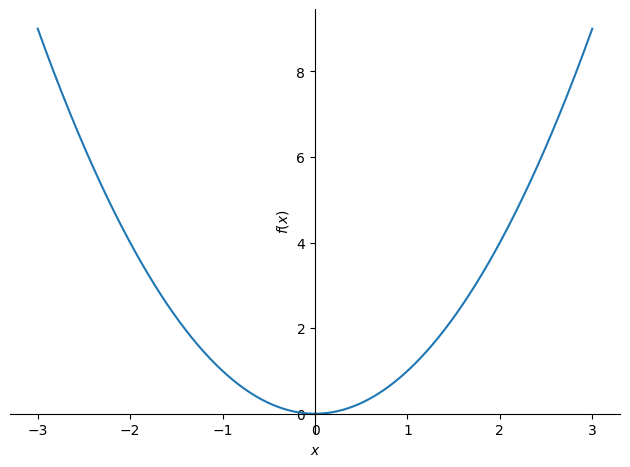

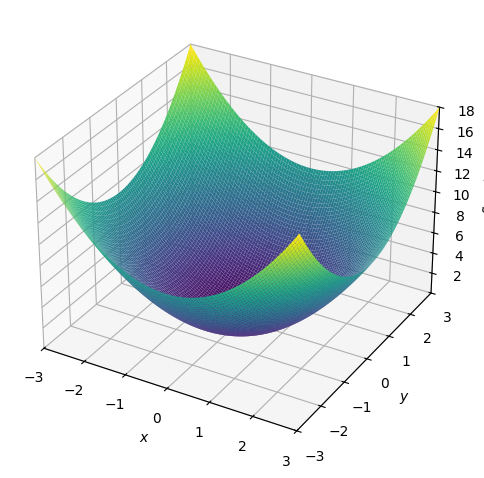

In [4]:
from sympy.plotting import plot, plot3d

plot(x**2, (x, -3, 3))  # 2D
plot3d(x**2 + y**2, (x, -3, 3), (y, -3, 3))  # 3D